In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
!mkdir .kaggle

In [4]:
!ls

drive  sample_data


In [5]:
import json
token ={"username":"akkinasrikar","key":"b997ebdcc23ad29e3a68ca90b4e5de7e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [9]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [10]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [11]:
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
!kaggle datasets list

ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
manchunhui/us-election-2020-tweets                        US Election 2020 Tweets                      247MB  2020-11-06 10:31:53            466  
headsortails/us-election-2020-presidential-debates        US Election 2020 - Presidential Debates      199MB  2020-10-23 16:56:10            205  
unanimad/us-election-2020                                 US Election 2020                             416KB  2020-11-06 23:46:30            309  
radustoicescu/2020-united-states-presidential-election    2020 United States presidential election      11MB  2019-07-04 15:00:45            532  
etsc9287/2020-general-election-polls                      2020 General Election Polls                  109KB  2020-02-

In [13]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:23<00:00, 37.9MB/s]
100% 2.06G/2.06G [00:23<00:00, 94.6MB/s]


In [14]:
!unzip '/content/{/content}/datasets/prashant268/chest-xray-covid19-pneumonia/chest-xray-covid19-pneumonia.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/COVID19(244).jpg  
  inflating: Data/train/COVID19/C

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import imread
import seaborn as sns
from PIL import Image
style.use("fivethirtyeight")
import os
import random

In [16]:
data="/content/Data"

In [17]:
os.listdir(data)

['train', 'test']

In [18]:
train_path="/content/Data/train/"
test_path="/content/Data/test/"

In [19]:
print(f"no of classes {len(os.listdir(train_path))}")
print(os.listdir(train_path))

no of classes 3
['COVID19', 'NORMAL', 'PNEUMONIA']


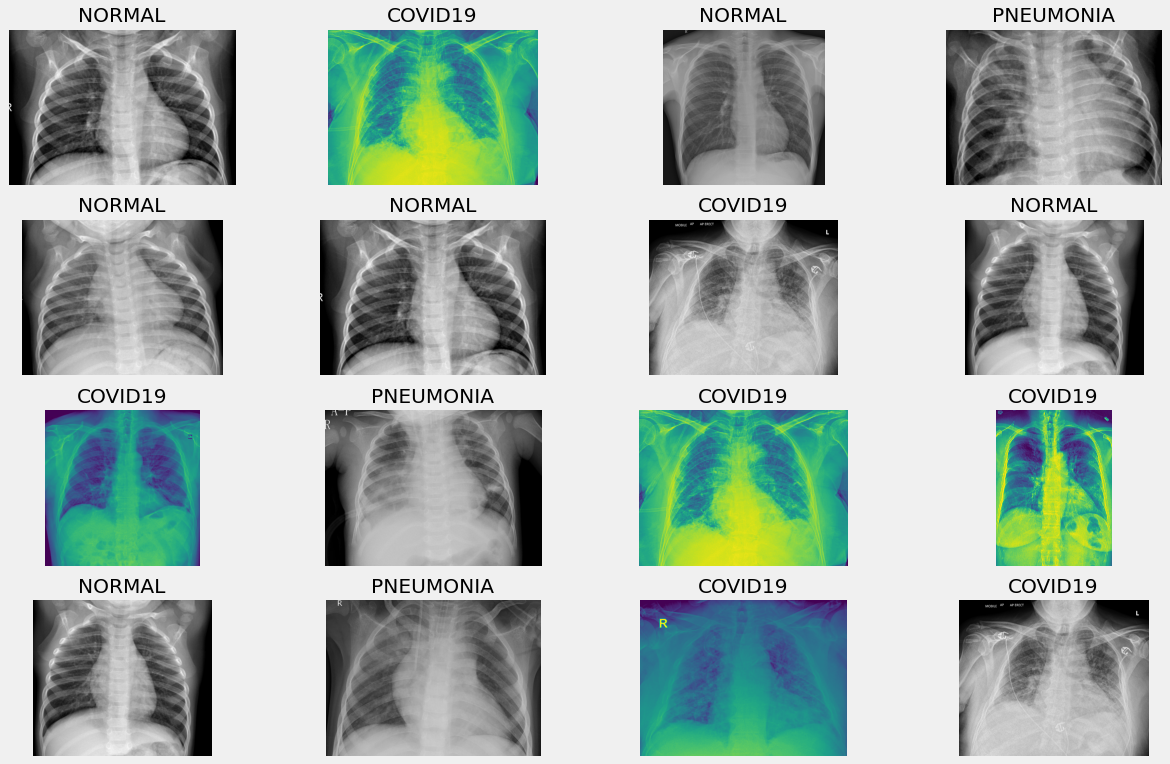

In [20]:
plt.figure(figsize=(19,12.5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    rn=random.randint(0,2)
    ri=random.randint(0,10)
    img_name=os.listdir(train_path)[rn]
    imgpath=train_path+img_name+"/"
    imgpath=imgpath+os.listdir(imgpath)[ri]
    plt.imshow(imread(imgpath))
    plt.title(img_name)
plt.show()

In [21]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [22]:
def load_image(img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    return img

In [23]:
def get_predictions(model):
    plt.figure(figsize=(26,5))
    for i in range(1,5):
        plt.subplot(1,5,i)
        plt.grid(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.imshow(Image.open(images[i-1]).resize((200,200),Image.ANTIALIAS))
    plt.figure(figsize=(32,5))
    for i,imgpath in enumerate(images):
        image=load_image(imgpath)
        pred=decode_predictions(model.predict(image),top=3)[0]
        plt.subplot(1,5,i+1)
        plt.grid(False)
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        sns.barplot(x=[j[2] for j in pred],y=[j[1] for j in pred],color="gray")
    plt.show()
    

In [24]:
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16

In [25]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(test_path + '/*/*.jp*g')

In [26]:
image_size=[200,200]
batch_size=32
epochs=10
folders = glob(train_path + '/*')
vgg16=VGG16(input_shape=image_size+[3],weights="imagenet",include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [27]:
for layer in vgg16.layers:
    layer.trainable=False
    
x=Flatten()(vgg16.output)
x=Dense(1000,activation='relu')(x)
prediction=Dense(len(folders),activation='softmax')(x)

In [28]:
model=Model(inputs=vgg16.input,outputs=prediction)

In [29]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)      

In [30]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [31]:
genarator=ImageDataGenerator( rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              preprocessing_function=preprocess_input)

In [32]:
test_gen=genarator.flow_from_directory(test_path,target_size=image_size)
print(test_gen.class_indices)

Found 1288 images belonging to 3 classes.
{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [33]:
labels=[None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v]=k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 145.1398


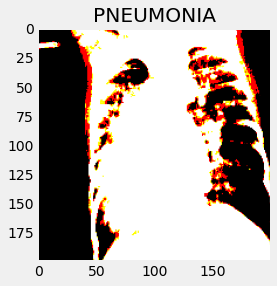

In [34]:
for x,y in test_gen:
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.grid(False)
    plt.imshow(x[0])
    plt.show()
    break   

In [35]:
train_genarator=genarator.flow_from_directory(train_path,
                                              target_size=image_size,
                                              shuffle=True,
                                              batch_size=batch_size)

Found 5144 images belonging to 3 classes.


In [36]:
validation_genarator=genarator.flow_from_directory(test_path,
                                              target_size=image_size,
                                              shuffle=False,
                                              batch_size=batch_size)

Found 1288 images belonging to 3 classes.


In [37]:
results=model.fit_generator(train_genarator,
                           validation_data=validation_genarator,
                           epochs=epochs,
                           steps_per_epoch=len(image_files)//batch_size,
                           validation_steps=len(valid_image_files)//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
160/160 [==============================] - 202s 1s/step - loss: 4.5545 - accuracy: 0.8775 - val_loss: 0.6530 - val_accuracy: 0.8922
Epoch 2/10
160/160 [==============================] - 200s 1s/step - loss: 0.3257 - accuracy: 0.9212 - val_loss: 0.2262 - val_accuracy: 0.9305
Epoch 3/10
160/160 [==============================] - 200s 1s/step - loss: 0.1951 - accuracy: 0.9415 - val_loss: 0.1528 - val_accuracy: 0.9492
Epoch 4/10
160/160 [==============================] - 202s 1s/step - loss: 0.1594 - accuracy: 0.9394 - val_loss: 0.2016 - val_accuracy: 0.9367
Epoch 5/10
160/160 [==============================] - 204s 1s/step - loss: 0.1479 - accuracy: 0.9499 - val_loss: 0.1574 - val_accuracy: 0.9477
Epoch 6/10
160/160 [==============================] - 202s 1s/step - loss: 0.1410 - accuracy: 0.9493 - val_loss: 0.1687 - val_accuracy: 0.9453
Epoch 7/10
160/160 [==============================] - 203s 1s/step

In [38]:
from tensorflow.keras.models import model_from_json

In [39]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [40]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [41]:
loaded_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
loaded_model.evaluate_generator(validation_genarator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.23667211830615997, 0.9301242232322693]

In [43]:
loaded_model.metrics_names

['loss', 'accuracy']

In [44]:
import pandas as pd
loss=pd.DataFrame(model.history.history)

<Figure size 720x432 with 0 Axes>

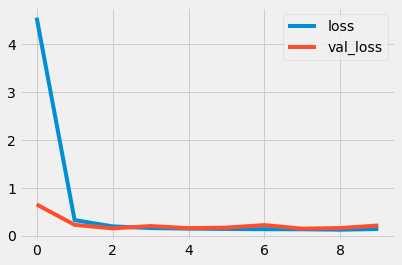

In [45]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

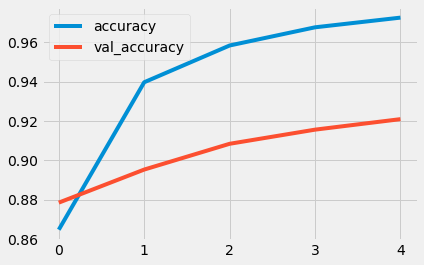

In [ ]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [46]:
y_pred=loaded_model.predict(validation_genarator)

In [47]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
print(confusion_matrix(validation_genarator.classes,y_pred_classes))
print(classification_report(validation_genarator.classes,y_pred_classes))

[[114   0   2]
 [  7 270  40]
 [  3  46 806]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       116
           1       0.85      0.85      0.85       317
           2       0.95      0.94      0.95       855

    accuracy                           0.92      1288
   macro avg       0.91      0.93      0.92      1288
weighted avg       0.92      0.92      0.92      1288

